In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot
from sklearn.decomposition import PCA


In [49]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [50]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

In [51]:
def create_model(input_dim):
    dnn= Sequential()
    dnn.add(Dense(128, input_dim = input_dim, activation='relu'))
    # dnn.add(Dropout(0.2))
    dnn.add(Dense(128, activation='relu'))
    # dnn.add(Dropout(0.2))
    dnn.add(Dense(128, activation='relu'))
    # dnn.add(Dropout(0.2))
    dnn.add(Dense(1, activation='linear'))
    # print('Model : DNN', dnn.summary())
    return dnn

# MSER

430 52
(430, 16) (52, 16) (430,) (52,)
(5, 16) (47, 16) (5,) (47,)
(430, 16) (430, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   runtime******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  runtime

R2: 
 -0.10185313366627002

MAPE 
 [0.16183146]
430 52
(430, 16) (52, 16) (430,) (52,)
(5, 16) (47, 16) (5,) (47,)
(430, 16) (430, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   power******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  power

R2: 
 0.634465083333339

MAPE 
 [0.46271364]
Final Result: *******************
R2: 0.26630597483353446
MAPE Runtime: [0.16183146]
MAPE Power: [0.46271364]


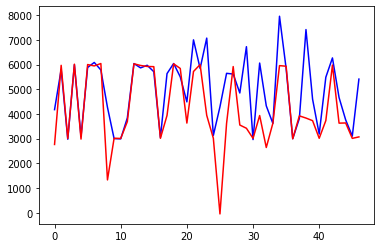

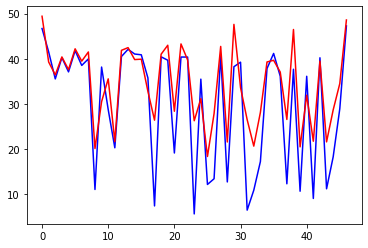

In [57]:
def dnn_univariate(val):   
    all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
    dataset_name_n = all_datasets +  'mser_physical' + '.csv'
    dataset_name = all_datasets +  'mser_simulated' + '.csv'

    df = pd.read_csv(dataset_name)
    dfn = pd.read_csv(dataset_name_n)


    print(len(df),len(dfn))

    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
    encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

    total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                            'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
    total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                        'isa_2'])
    total_data = total_data.fillna(0)
    total_data_n = total_data_n.fillna(0)

    X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
    Y_sim = total_data[val].to_numpy()
    X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
    Y_phy = total_data_n[val].to_numpy()

    print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

    # Separating Physical data to 10% and 90%
    X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
    print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)


    scaler_X_sim = StandardScaler()
    scaler_X_sim.fit(X_sim)
    X_sim = scaler_X_sim.transform(X_sim)
    
    scaler_X_phy = StandardScaler()
    scaler_X_phy.fit(X_phy)
    X_train_phy = scaler_X_phy.transform(X_train_phy)
    X_test_phy = scaler_X_phy.transform(X_test_phy)

    Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
    Y_phy = np.reshape(Y_phy, (len(Y_phy),1))
    
    scaler_Y_sim = StandardScaler() 
    scaler_Y_sim.fit(Y_sim)
    
    scaler_Y_phy = StandardScaler() 
    scaler_Y_phy.fit(Y_phy)
    
    
    Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
    Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))

    Y_sim = scaler_Y_sim.transform(Y_sim)
    Y_test_phy = scaler_Y_phy.transform(Y_test_phy)
    Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


    print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

    model = create_model(input_dim = X_sim.shape[1])
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    print('Fitting model for   ' + val + '******************************')
    model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
    # Freeze the layers except the last 2 dense layers
    for layer in model.layers[:-2]:
        layer.trainable = False
        # print(layer)

    # Check the trainable status of the individual layers
    # for layer in model.layers:
        # print(layer, layer.trainable)
    
    print('Doing Fine Tuning***********************')
    model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
    Y_pred = model.predict(X_test_phy)

    Y_fold = Y_test_phy
    Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
    Y_pred = scaler_Y_phy.inverse_transform(Y_pred)
    plt.figure()
    plt.plot(Y_fold, 'b')
    plt.plot(Y_pred, 'r')


    r2_scores = (r2_score(Y_fold, Y_pred))
    mape_scores_runtime = (absolute_percentage_error(Y_fold, Y_pred))
    print('Scores for ', val)
    print('\nR2: \n', r2_scores)
    print('\nMAPE \n', mape_scores_runtime)
    
    return r2_scores, mape_scores_runtime

r2_runtime, mape_runtime = dnn_univariate(val = 'runtime')
r2_power, mape_power = dnn_univariate(val = 'power')
print('Final Result: *******************')
print('R2:', np.mean([r2_runtime, r2_power]))
print('MAPE Runtime:', mape_runtime)
print('MAPE Power:', mape_power)

# Tracking

425 52
(425, 16) (52, 16) (425,) (52,)
(5, 16) (47, 16) (5,) (47,)
(425, 16) (425, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   runtime******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  runtime

R2: 
 -0.07803476870205883

MAPE 
 [0.11753709]
425 52
(425, 16) (52, 16) (425,) (52,)
(5, 16) (47, 16) (5,) (47,)
(425, 16) (425, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   power******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  power

R2: 
 0.5468598498745438

MAPE 
 [0.39192499]
Final Result: *******************
R2: 0.2344125405862425
MAPE Runtime: [0.11753709]
MAPE Power: [0.39192499]


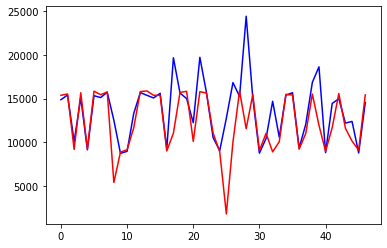

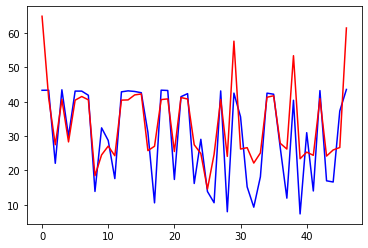

In [58]:
################## Data Preprocessing ######################

def dnn_univariate(val):   
    all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
    dataset_name_n = all_datasets +  'tracking_physical' + '.csv'
    dataset_name = all_datasets +  'tracking_simulated' + '.csv'

    df = pd.read_csv(dataset_name)
    dfn = pd.read_csv(dataset_name_n)


    print(len(df),len(dfn))

    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
    encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

    total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                            'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
    total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                        'isa_2'])
    total_data = total_data.fillna(0)
    total_data_n = total_data_n.fillna(0)

    X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
    Y_sim = total_data[val].to_numpy()
    X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
    Y_phy = total_data_n[val].to_numpy()

    print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

    # Separating Physical data to 10% and 90%
    X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
    print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)


    scaler_X_sim = StandardScaler()
    scaler_X_sim.fit(X_sim)
    X_sim = scaler_X_sim.transform(X_sim)
    
    scaler_X_phy = StandardScaler()
    scaler_X_phy.fit(X_phy)
    X_train_phy = scaler_X_phy.transform(X_train_phy)
    X_test_phy = scaler_X_phy.transform(X_test_phy)

    Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
    Y_phy = np.reshape(Y_phy, (len(Y_phy),1))
    
    scaler_Y_sim = StandardScaler() 
    scaler_Y_sim.fit(Y_sim)
    
    scaler_Y_phy = StandardScaler() 
    scaler_Y_phy.fit(Y_phy)
    
    
    Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
    Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))

    Y_sim = scaler_Y_sim.transform(Y_sim)
    Y_test_phy = scaler_Y_phy.transform(Y_test_phy)
    Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


    print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

    model = create_model(input_dim = X_sim.shape[1])
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    print('Fitting model for   ' + val + '******************************')
    model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
    # Freeze the layers except the last 2 dense layers
    for layer in model.layers[:-2]:
        layer.trainable = False
        # print(layer)

    # Check the trainable status of the individual layers
    # for layer in model.layers:
        # print(layer, layer.trainable)
    
    print('Doing Fine Tuning***********************')
    model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
    Y_pred = model.predict(X_test_phy)

    Y_fold = Y_test_phy
    Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
    Y_pred = scaler_Y_phy.inverse_transform(Y_pred)
    plt.figure()
    plt.plot(Y_fold, 'b')
    plt.plot(Y_pred, 'r')


    r2_scores = (r2_score(Y_fold, Y_pred))
    mape_scores_runtime = (absolute_percentage_error(Y_fold, Y_pred))
    print('Scores for ', val)
    print('\nR2: \n', r2_scores)
    print('\nMAPE \n', mape_scores_runtime)
    
    return r2_scores, mape_scores_runtime

r2_runtime, mape_runtime = dnn_univariate(val = 'runtime')
r2_power, mape_power = dnn_univariate(val = 'power')
print('Final Result: *******************')
print('R2:', np.mean([r2_runtime, r2_power]))
print('MAPE Runtime:', mape_runtime)
print('MAPE Power:', mape_power)

# Stitch

425 52
(425, 16) (52, 16) (425,) (52,)
(5, 16) (47, 16) (5,) (47,)
(425, 16) (425, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   runtime******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  runtime

R2: 
 -0.046194692752589805

MAPE 
 [0.11346172]
425 52
(425, 16) (52, 16) (425,) (52,)
(5, 16) (47, 16) (5,) (47,)
(425, 16) (425, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   power******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  power

R2: 
 0.6955262592339664

MAPE 
 [0.32925657]
Final Result: *******************
R2: 0.3246657832406883
MAPE Runtime: [0.11346172]
MAPE Power: [0.32925657]


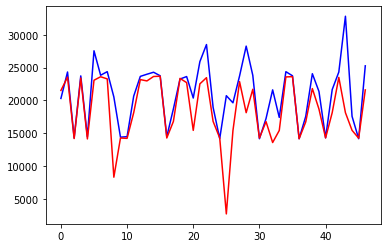

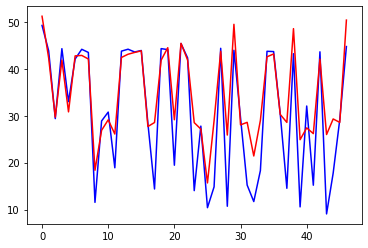

In [55]:
################## Data Preprocessing ######################

################## Data Preprocessing ######################

def dnn_univariate(val):   
    all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
    dataset_name_n = all_datasets +  'stitch_physical' + '.csv'
    dataset_name = all_datasets +  'stitch_simulated' + '.csv'

    df = pd.read_csv(dataset_name)
    dfn = pd.read_csv(dataset_name_n)


    print(len(df),len(dfn))

    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
    encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

    total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                            'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
    total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                        'isa_2'])
    total_data = total_data.fillna(0)
    total_data_n = total_data_n.fillna(0)

    X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
    Y_sim = total_data[val].to_numpy()
    X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
    Y_phy = total_data_n[val].to_numpy()

    print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

    # Separating Physical data to 10% and 90%
    X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
    print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)


    scaler_X_sim = StandardScaler()
    scaler_X_sim.fit(X_sim)
    X_sim = scaler_X_sim.transform(X_sim)
    
    scaler_X_phy = StandardScaler()
    scaler_X_phy.fit(X_phy)
    X_train_phy = scaler_X_phy.transform(X_train_phy)
    X_test_phy = scaler_X_phy.transform(X_test_phy)

    Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
    Y_phy = np.reshape(Y_phy, (len(Y_phy),1))
    
    scaler_Y_sim = StandardScaler() 
    scaler_Y_sim.fit(Y_sim)
    
    scaler_Y_phy = StandardScaler() 
    scaler_Y_phy.fit(Y_phy)
    
    
    Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
    Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))

    Y_sim = scaler_Y_sim.transform(Y_sim)
    Y_test_phy = scaler_Y_phy.transform(Y_test_phy)
    Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


    print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

    model = create_model(input_dim = X_sim.shape[1])
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    print('Fitting model for   ' + val + '******************************')
    model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
    # Freeze the layers except the last 2 dense layers
    for layer in model.layers[:-2]:
        layer.trainable = False
        # print(layer)

    # Check the trainable status of the individual layers
    # for layer in model.layers:
        # print(layer, layer.trainable)
    
    print('Doing Fine Tuning***********************')
    model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
    Y_pred = model.predict(X_test_phy)

    Y_fold = Y_test_phy
    Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
    Y_pred = scaler_Y_phy.inverse_transform(Y_pred)
    plt.figure()
    plt.plot(Y_fold, 'b')
    plt.plot(Y_pred, 'r')


    r2_scores = (r2_score(Y_fold, Y_pred))
    mape_scores_runtime = (absolute_percentage_error(Y_fold, Y_pred))
    print('Scores for ', val)
    print('\nR2: \n', r2_scores)
    print('\nMAPE \n', mape_scores_runtime)
    
    return r2_scores, mape_scores_runtime

r2_runtime, mape_runtime = dnn_univariate(val = 'runtime')
r2_power, mape_power = dnn_univariate(val = 'power')
print('Final Result: *******************')
print('R2:', np.mean([r2_runtime, r2_power]))
print('MAPE Runtime:', mape_runtime)
print('MAPE Power:', mape_power)

 # SVM

390 52
(390, 16) (52, 16) (390,) (52,)
(5, 16) (47, 16) (5,) (47,)
(390, 16) (390, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   runtime******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  runtime

R2: 
 -0.9962847146207947

MAPE 
 [0.09056849]
390 52
(390, 16) (52, 16) (390,) (52,)
(5, 16) (47, 16) (5,) (47,)
(390, 16) (390, 1) (5, 16) (5, 1) (47, 16) (47, 1)
Fitting model for   power******************************
Doing Fine Tuning***********************


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Scores for  power

R2: 
 0.14878813189071494

MAPE 
 [0.32308699]
Final Result: *******************
R2: -0.4237482913650399
MAPE Runtime: [0.09056849]
MAPE Power: [0.32308699]


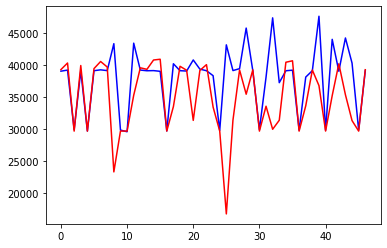

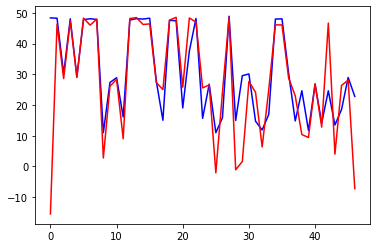

In [56]:
################## Data Preprocessing ######################

################## Data Preprocessing ######################

################## Data Preprocessing ######################

def dnn_univariate(val):   
    all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
    dataset_name_n = all_datasets +  'svm_physical' + '.csv'
    dataset_name = all_datasets +  'svm_simulated' + '.csv'
    df = pd.read_csv(dataset_name)
    dfn = pd.read_csv(dataset_name_n)


    print(len(df),len(dfn))

    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
    encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

    total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                            'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
    total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                        'isa_2'])
    total_data = total_data.fillna(0)
    total_data_n = total_data_n.fillna(0)

    X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
    Y_sim = total_data[val].to_numpy()
    X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
    Y_phy = total_data_n[val].to_numpy()

    print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

    # Separating Physical data to 10% and 90%
    X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
    print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)


    scaler_X_sim = StandardScaler()
    scaler_X_sim.fit(X_sim)
    X_sim = scaler_X_sim.transform(X_sim)
    
    scaler_X_phy = StandardScaler()
    scaler_X_phy.fit(X_phy)
    X_train_phy = scaler_X_phy.transform(X_train_phy)
    X_test_phy = scaler_X_phy.transform(X_test_phy)

    Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
    Y_phy = np.reshape(Y_phy, (len(Y_phy),1))
    
    scaler_Y_sim = StandardScaler() 
    scaler_Y_sim.fit(Y_sim)
    
    scaler_Y_phy = StandardScaler() 
    scaler_Y_phy.fit(Y_phy)
    
    
    Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
    Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))

    Y_sim = scaler_Y_sim.transform(Y_sim)
    Y_test_phy = scaler_Y_phy.transform(Y_test_phy)
    Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


    print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

    model = create_model(input_dim = X_sim.shape[1])
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    print('Fitting model for   ' + val + '******************************')
    model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
    # Freeze the layers except the last 2 dense layers
    for layer in model.layers[:-2]:
        layer.trainable = False
        # print(layer)

    # Check the trainable status of the individual layers
    # for layer in model.layers:
        # print(layer, layer.trainable)
    
    print('Doing Fine Tuning***********************')
    model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
    Y_pred = model.predict(X_test_phy)

    Y_fold = Y_test_phy
    Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
    Y_pred = scaler_Y_phy.inverse_transform(Y_pred)
    plt.figure()
    plt.plot(Y_fold, 'b')
    plt.plot(Y_pred, 'r')


    r2_scores = (r2_score(Y_fold, Y_pred))
    mape_scores_runtime = (absolute_percentage_error(Y_fold, Y_pred))
    print('Scores for ', val)
    print('\nR2: \n', r2_scores)
    print('\nMAPE \n', mape_scores_runtime)
    
    return r2_scores, mape_scores_runtime

r2_runtime, mape_runtime = dnn_univariate(val = 'runtime')
r2_power, mape_power = dnn_univariate(val = 'power')
print('Final Result: *******************')
print('R2:', np.mean([r2_runtime, r2_power]))
print('MAPE Runtime:', mape_runtime)
print('MAPE Power:', mape_power)